# Analyse einer Twitter-Abfrage zum Wort vegan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Daten einlesen

In [2]:
# Laden der Dataframes 
## TW ....csv sind Tweets
## RT ...csv sind Retweets
tweets_df = pd.read_csv('../data/Merged_TW.csv')
retweets_df = pd.read_csv('../data/Merged_RT.csv')

### Zahl der twetter und ihrer tweets
Wieviele tweeter und retweeter sind in der Abfrage?

In [3]:
tweeter = tweets_df["user_name"].unique()
tweets = tweets_df["tweet_id"].unique()
tweet_fol_max = tweets_df["followers_count"].max()
tweet_fol_avg = tweets_df["followers_count"].mean()
tweet_fol_median = tweets_df["followers_count"].median()
tweet_friends_max = tweets_df["friends_count"].max()
tweet_favourite_median = tweets_df["favourite_count"].median()
tweet_favourite_max = tweets_df["favourite_count"].max()

print("tweeter" ,len(tweeter), "\n-> ihre tweets",len(tweets), "\n-> followers max", tweet_fol_max, "avg", tweet_fol_avg, 
      "median", tweet_fol_median,"\n-> friends max", tweet_friends_max, "\n-> gefällt mir max" ,tweet_favourite_max, "median", tweet_favourite_median)

tweeter 2110 
-> ihre tweets 2645 
-> followers max 49690042 avg 52185.8015578635 median 515.5 
-> friends max 333139 
-> gefällt mir max 10754 median 0.0


In [4]:
retweeter = retweets_df["user_name"].unique()
retweets = retweets_df["tweet_id"].unique()
retweets_median = retweets_df["retweet_count"].median()
retweets_quant_09 = retweets_df["retweet_count"].quantile(0.9)
retweets_max = retweets_df["retweet_count"].max()
retweet_fol_max = retweets_df["followers_count"].max()
retweets_fol_quant_09 = retweets_df["followers_count"].quantile(0.9)
retweet_friends_max = retweets_df["friends_count"].max()


print("retweeter" ,len(retweeter), "\n-> ihre retweets",len(retweets),
      "\n-> retweets Median",retweets_median," nur 10% haben mehr als" ,retweets_quant_09," retweets  - max", retweets_max,
      "\n-> followers max", retweet_fol_max," nur 10% haben mehr als ",retweets_fol_quant_09,"followers",
      "\n-> friends max", retweet_friends_max)

retweeter 1321 
-> ihre retweets 1569 
-> retweets Median 30.0  nur 10% haben mehr als 88.0  retweets  - max 464 
-> followers max 1081206  nur 10% haben mehr als  5466.599999999999 followers 
-> friends max 70705


In [5]:
print(tweets_df.shape)


(2696, 19)


#### Sortiere die tweets
Tweeter mit vielen retweets werden hier zuerst angezeigt.

In [6]:
tweets_df.sort_values(by=['retweet_count'], ascending = False).head(2)


Unnamed: 0  Unnamed: 0.1             tweet_id  \
1037        1037           168  1377274263636373504   
873          873             4  1377274275846098946   

                       creation_date  \
1037  Wed Mar 31 14:59:07 +0000 2021   
873   Wed Mar 31 14:59:10 +0000 2021   

                                              full_text  \
1037  RT @NCTsmtown: Cover｜KUN, CHENLE - free love (...   
873   RT @JeffKasanoff: Love seeing Christians be li...   

                         mentions  \
1037  ['NCTsmtown', 'hellohonne']   
873              ['JeffKasanoff']   

                                      entities_hashtags         user_name  \
1037  ['Cover', 'KUN', 'CHENLE', 'freelove', '커버', '...  𝒥𝒶𝓃𝒶𝓇𝒶✨ʳᵉˢᵗ`ᵉˣᵃᵐ   
873                                                  []             Winsh   

     user_screen_name              user_id     location  \
1037        cutiejmna  1202264747539718144    🄳🅁🄴🄰🄼🄻🄰🄽🄳   
873             winsh  1170025054261993473  Houston, TX   

                                            description  protected  \
1037  #𝕁𝔸𝔼𝕄𝕀ℕ :  𝕎𝕙𝕖𝕟 𝕐𝕠𝕦 𝕊𝕞𝕚𝕝𝕖, 𝕥𝕙𝕖 𝕎𝕙𝕠𝕝𝕖 𝕎𝕠𝕣𝕝𝕕 𝕊𝕞𝕚...      False   
873   Data Engineer. Business Development Consultant...      False   

      followers_count  friends_count              profile_created_at  \
1037             1541           1514  Wed Dec 04 16:34:03 +0000 2019   
873               300            211  Fri Sep 06 17:25:22 +0000 2019   

      retweet_count  favourite_count search_key  
1037          54333                0       love  
873           47436                0       love

In [7]:
# Gesammelte Retweets auf obige Tweets
## Primärschlüssel tweet_id, Fremdschlüssel auf Tabelle TW..csv ist "RT_of_ID"
print(retweets_df.shape)
retweets_df.head(3)

(1723, 20)


Unnamed: 0  Unnamed: 0.1             tweet_id  \
0           0             0  1377138218387169284   
1           1             1  1377102038090190849   
2           2             2  1376965400898891777   

                    creation_date  \
0  Wed Mar 31 05:58:31 +0000 2021   
1  Wed Mar 31 03:34:45 +0000 2021   
2  Tue Mar 30 18:31:49 +0000 2021   

                                           full_text    mentions  \
0  RT @PETAUK: Animal agriculture is responsible ...  ['PETAUK']   
1  RT @PETAUK: Animal agriculture is responsible ...  ['PETAUK']   
2  RT @PETAUK: Animal agriculture is responsible ...  ['PETAUK']   

  entities_hashtags               user_name user_screen_name     user_id  \
0                []           Lisa Thompson   thegaudidragon   389070232   
1                []  Lance Link Resists 🙈🙉🙊  LancelotLinkSpy  2502992592   
2                []           Maureen Gough         toranada    86248360   

        location                                        description  \
0     Manchester                                                NaN   
1  United States  Brought Back From The Cold War! \n#ResistFasci...   
2         Canada       Love all animals and can not tolerate abuse!   

   protected  followers_count  friends_count              profile_created_at  \
0      False              395            203  Tue Oct 11 20:15:10 +0000 2011   
1      False            27081          28139  Sun May 18 01:29:47 +0000 2014   
2      False              665            707  Fri Oct 30 05:38:23 +0000 2009   

   retweet_count  favourite_count             RT_of_ID search_key  
0             42                0  1376807909930188803     #vegan  
1             42                0  1376807909930188803     #vegan  
2             42                0  1376807909930188803     #vegan

### Dateien zusammenführen

In [8]:
# Joinen der beiden DF mit Left-Join 
#df = pd.merge(left=tweets_df, right=retweets_df, how='left', left_on='tweet_id', right_on='RT_of_ID')
df = pd.merge(tweets_df, retweets_df, left_on='tweet_id', right_on='RT_of_ID')
df.head(2)

Unnamed: 0_x  Unnamed: 0.1_x           tweet_id_x  \
0             7               7  1374635927730020352   
1             7               7  1374635927730020352   

                  creation_date_x  \
0  Wed Mar 24 08:15:19 +0000 2021   
1  Wed Mar 24 08:15:19 +0000 2021   

                                         full_text_x mentions_x  \
0  A simple answer to this is to choose 2b #Vegan...         []   
1  A simple answer to this is to choose 2b #Vegan...         []   

  entities_hashtags_x user_name_x user_screen_name_x  user_id_x  ...  \
0           ['Vegan']  Peter Egan         PeterEgan6  452100948  ...   
1           ['Vegan']  Peter Egan         PeterEgan6  452100948  ...   

  location_y                                      description_y  protected_y  \
0        NaN  I love all animals n have no time for people w...        False   
1        NaN                                                NaN        False   

   followers_count_y  friends_count_y            profile_created_at_y  \
0                969              925  Fri Feb 25 20:41:12 +0000 2011   
1               1243             2333  Thu Nov 09 23:40:41 +0000 2017   

   retweet_count_y  favourite_count_y             RT_of_ID  search_key_y  
0               34                  0  1374635927730020352        #vegan  
1               34                  0  1374635927730020352        #vegan  

[2 rows x 39 columns]

In [9]:
# Welche columns kann ich auswerten?
df.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1_x', 'tweet_id_x', 'creation_date_x',
       'full_text_x', 'mentions_x', 'entities_hashtags_x', 'user_name_x',
       'user_screen_name_x', 'user_id_x', 'location_x', 'description_x',
       'protected_x', 'followers_count_x', 'friends_count_x',
       'profile_created_at_x', 'retweet_count_x', 'favourite_count_x',
       'search_key_x', 'Unnamed: 0_y', 'Unnamed: 0.1_y', 'tweet_id_y',
       'creation_date_y', 'full_text_y', 'mentions_y', 'entities_hashtags_y',
       'user_name_y', 'user_screen_name_y', 'user_id_y', 'location_y',
       'description_y', 'protected_y', 'followers_count_y', 'friends_count_y',
       'profile_created_at_y', 'retweet_count_y', 'favourite_count_y',
       'RT_of_ID', 'search_key_y'],
      dtype='object')

In [10]:
df.describe()

Unnamed: 0_x  Unnamed: 0.1_x    tweet_id_x     user_id_x  \
count   2280.000000     2280.000000  2.280000e+03  2.280000e+03   
mean    1828.245614       33.836842  1.374259e+18  1.041645e+17   
std      812.735916       50.735915  1.451833e+15  3.406113e+17   
min        7.000000        0.000000  1.371462e+18  8.070950e+05   
25%     1986.500000        8.000000  1.373734e+18  1.724321e+07   
50%     2246.000000       17.000000  1.374059e+18  4.955115e+07   
75%     2274.000000       31.000000  1.374636e+18  4.521009e+08   
max     2492.000000      249.000000  1.377258e+18  1.376579e+18   

       followers_count_x  friends_count_x  retweet_count_x  favourite_count_x  \
count       2.280000e+03      2280.000000      2280.000000        2280.000000   
mean        1.006322e+06     10307.054386        50.435088         325.199561   
std         4.493364e+06     18779.352390        61.404665         765.409614   
min         1.000000e+00         0.000000         1.000000           0.000000   
25%         4.245300e+04       904.000000        20.750000          53.000000   
50%         1.223760e+05      5030.000000        34.000000         103.000000   
75%         1.081081e+06      7907.000000        58.000000         265.000000   
max         4.969004e+07    154441.000000       464.000000        5923.000000   

       Unnamed: 0_y  Unnamed: 0.1_y    tweet_id_y     user_id_y  \
count   2280.000000     2280.000000  2.280000e+03  2.280000e+03   
mean     864.548246      230.777632  1.374508e+18  4.920610e+17   
std      479.444094      197.962174  1.408852e+15  5.690404e+17   
min        0.000000        0.000000  1.371462e+18  6.634632e+06   
25%      471.750000       62.000000  1.373995e+18  3.381257e+08   
50%      892.500000      184.000000  1.374288e+18  3.077488e+09   
75%     1268.250000      350.000000  1.374771e+18  1.114424e+18   
max     1722.000000      766.000000  1.377267e+18  1.375985e+18   

       followers_count_y  friends_count_y  retweet_count_y  favourite_count_y  \
count       2.280000e+03      2280.000000      2280.000000             2280.0   
mean        3.580326e+03      1704.798246        51.318860                0.0   
std         2.958627e+04      4016.515161        61.714417                0.0   
min         0.000000e+00         0.000000         1.000000                0.0   
25%         8.800000e+01       180.000000        21.000000                0.0   
50%         3.585000e+02       518.000000        34.000000                0.0   
75%         1.393500e+03      1872.000000        58.000000                0.0   
max         1.081206e+06     70705.000000       464.000000                0.0   

           RT_of_ID  
count  2.280000e+03  
mean   1.374259e+18  
std    1.451833e+15  
min    1.371462e+18  
25%    1.373734e+18  
50%    1.374059e+18  
75%    1.374636e+18  
max    1.377258e+18

In [11]:
# Eine beliebige Tweet ID samplen aus dem Retweet Dataframe
test_id = retweets_df.loc[0, 'RT_of_ID']

In [12]:
# Suchen der Tweet_ID im neuen DF müssten gleich viele SPalten sein wie im Retweets Dataframe, wenn nach gleicher ID gesucht wird
df[df['tweet_id_x'] == test_id].shape
df[df['tweet_id_x'] == test_id].head(2)

Unnamed: 0_x  Unnamed: 0.1_x           tweet_id_x  \
120           100               0  1376807909930188803   
121           100               0  1376807909930188803   

                    creation_date_x  \
120  Tue Mar 30 08:06:00 +0000 2021   
121  Tue Mar 30 08:06:00 +0000 2021   

                                           full_text_x mentions_x  \
120  Animal agriculture is responsible for a greate...         []   
121  Animal agriculture is responsible for a greate...         []   

       entities_hashtags_x user_name_x user_screen_name_x  user_id_x  ...  \
120  ['vegan', 'Heatwave']     PETA UK             PETAUK  357584312  ...   
121  ['vegan', 'Heatwave']     PETA UK             PETAUK  357584312  ...   

        location_y                                      description_y  \
120     Manchester                                                NaN   
121  United States  Brought Back From The Cold War! \n#ResistFasci...   

     protected_y  followers_count_y  friends_count_y  \
120        False                395              203   
121        False              27081            28139   

               profile_created_at_y  retweet_count_y  favourite_count_y  \
120  Tue Oct 11 20:15:10 +0000 2011               42                  0   
121  Sun May 18 01:29:47 +0000 2014               42                  0   

                RT_of_ID  search_key_y  
120  1376807909930188803        #vegan  
121  1376807909930188803        #vegan  

[2 rows x 39 columns]

In [13]:
retweets_df[retweets_df['RT_of_ID'] == test_id].shape
retweets_df[retweets_df['RT_of_ID'] == test_id].head(2)

Unnamed: 0  Unnamed: 0.1             tweet_id  \
0           0             0  1377138218387169284   
1           1             1  1377102038090190849   

                    creation_date  \
0  Wed Mar 31 05:58:31 +0000 2021   
1  Wed Mar 31 03:34:45 +0000 2021   

                                           full_text    mentions  \
0  RT @PETAUK: Animal agriculture is responsible ...  ['PETAUK']   
1  RT @PETAUK: Animal agriculture is responsible ...  ['PETAUK']   

  entities_hashtags               user_name user_screen_name     user_id  \
0                []           Lisa Thompson   thegaudidragon   389070232   
1                []  Lance Link Resists 🙈🙉🙊  LancelotLinkSpy  2502992592   

        location                                        description  \
0     Manchester                                                NaN   
1  United States  Brought Back From The Cold War! \n#ResistFasci...   

   protected  followers_count  friends_count              profile_created_at  \
0      False              395            203  Tue Oct 11 20:15:10 +0000 2011   
1      False            27081          28139  Sun May 18 01:29:47 +0000 2014   

   retweet_count  favourite_count             RT_of_ID search_key  
0             42                0  1376807909930188803     #vegan  
1             42                0  1376807909930188803     #vegan

## Auswertung TW

In [14]:
# Defintion des Anteils
viele = 0.98

# Auwahl des Anteils
t_fol_viele = tweets_df['followers_count'].quantile(viele)
df_fol = tweets_df.loc[(tweets_df['followers_count'] >= t_fol_viele)].drop_duplicates("user_name").sort_values(by=['followers_count'], ascending=False)[['user_id','user_name','user_screen_name','followers_count','retweet_count','favourite_count','friends_count']]
df_fol

user_id                     user_name user_screen_name  \
2273      807095            The New York Times          nytimes   
1182     2883841                       E! News            enews   
2242    86254626                Preity G Zinta  realpreityzinta   
2226    15808765                   Cory Booker       CoryBooker   
2235    17243213   Recording Academy / GRAMMYs    RecordingAcad   
2246   173195708                Nigella Lawson   Nigella_Lawson   
2238    15947602                    Change.org           Change   
2250  4020532937                         Tasty            tasty   
102     41707730             NYX Pro Makeup US     NyxCosmetics   
2257    14464766                      moby XⓋX   thelittleidiot   
101      9890492                          PETA             peta   
2249    40851965              Stella McCartney  StellaMcCartney   
103    113560280                  Mayim Bialik        missmayim   
2266   339061487                        Pomp 🌪       APompliano   
2227   302111485                   Enes Kanter       EnesKanter   
1800  1573265498                       FINNEAS          finneas   
2228    22956018                    jann arden        jannarden   
2254  4805771380                  Food Insider      FoodInsider   
2280   116579971                      Gad Saad          GadSaad   
2241   774187063                 BuzzFeed Food     BuzzFeedFood   
1358  2395996238  Promo for Artists & Business         mzpromoz   
2243  1526321732           Dr. Mike Varshavski   RealDoctorMike   
2253    33787936             Mercy For Animals  MercyForAnimals   
2248    32184345               Nicola Coughlan   nicolacoughlan   
2626    84795529                      SBI Card  SBICard_Connect   
1493    21754399             The Vegan Society  TheVeganSociety   

      followers_count  retweet_count  favourite_count  friends_count  
2273         49690042             33              248            805  
1182         11778536              1                5         112693  
2242          5362233            168             6127            108  
2226          4963061             68              550          89022  
2235          3381516             20              244          19585  
2246          2745127             88              862            915  
2238          1590722             18               41            688  
2250          1433947            101              344            174  
102           1164195             23              297            184  
2257          1159108            464             2232           1992  
101           1081081             15               53           5036  
2249           998416            140              750            580  
103            680266             22              650            209  
2266           664286             21              144           5577  
2227           472937            128             1904            307  
1800           446537             12                0            407  
2228           335131             40              134           7907  
2254           326372             20               65             90  
2280           319865             33              251            236  
2241           319088             19               74            276  
1358           309977              0                0         333139  
2243           296584             31              480            256  
2253           296573             20               60           1576  
2248           265865            131             5785           1365  
2626           264648              0                0             99  
1493           238609              3                3           7297

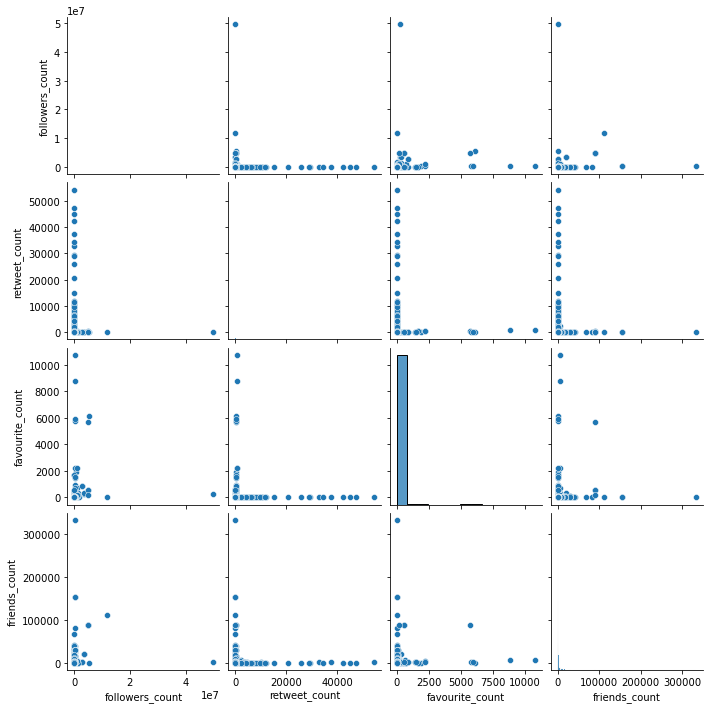

In [15]:
tweet_val = tweets_df[['followers_count','retweet_count','favourite_count','friends_count']]
ax = sns.pairplot(tweet_val)

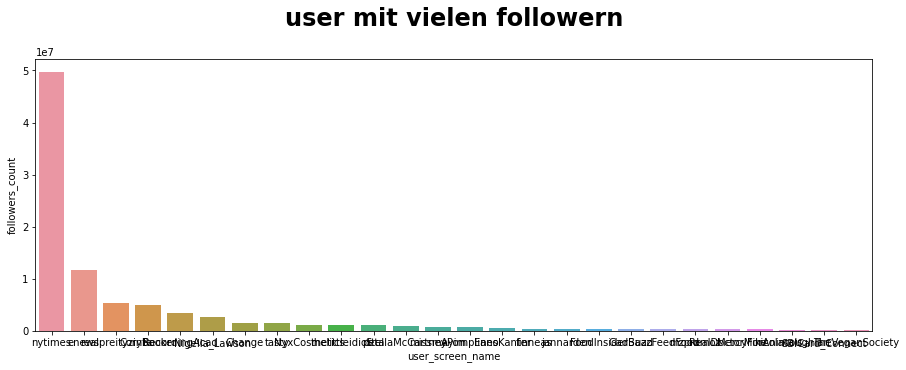

In [16]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen followern", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_screen_name", y="followers_count", data=df_fol)

### Wer hat am meisten favourits?

In [17]:
favour_viele = tweets_df['favourite_count'].quantile(viele)
df_favour = tweets_df.loc[(tweets_df['favourite_count'] >= favour_viele)].drop_duplicates("user_name").sort_values(by=['favourite_count'], ascending=False)[['user_id','user_name','user_screen_name','followers_count','retweet_count','favourite_count','friends_count']]
df_favour

user_id                                 user_name  \
2222             17396566                                     Petco   
2242             86254626                            Preity G Zinta   
2248             32184345                           Nicola Coughlan   
2257             14464766                                  moby XⓋX   
2256            394087611                      Dr. Angela Rasmussen   
2227            302111485                               Enes Kanter   
2223  1204095351944368139                               Spike Cohen   
2224             87371781  Imani Barbarin, MAGC | Crutches&Spice ♿️   
2231            392303546                                     Ariam   
104              15728242                                  richroll   
2246            173195708                            Nigella Lawson   
2249             40851965                          Stella McCartney   
2259             15344145                               Dawn Foster   
103             113560280                              Mayim Bialik   
2299            189088175                         The Vegan Gorilla   
2226             15808765                               Cory Booker   
2251             18027434                          Mark Hyman, M.D.   
2243           1526321732                       Dr. Mike Varshavski   
105              16014435                            Ingrid Newkirk   
2258           2659372678                  🇬🇧 Dr Dominic Pimenta 🇬🇧   
2250           4020532937                                     Tasty   
2252           4416456732                 Andrew D. Huberman, Ph.D.   
102              41707730                         NYX Pro Makeup US   
2232           3235113399                          Plant Based News   
1803             32657741                                    StaMac   
2280            116579971                                  Gad Saad   
2273               807095                        The New York Times   
2235             17243213               Recording Academy / GRAMMYs   
107               9890492                                      PETA   
1521   808774010716700672                             coffeespoonie   
1449            161800244                               Dominique 🌱   
2266            339061487                                    Pomp 🌪   
2228             22956018                                jann arden   
2292             30135143                                 Alan Jope   
110             452100948                                Peter Egan   

     user_screen_name  followers_count  retweet_count  favourite_count  \
2222            Petco           179102            653             8812   
2242  realpreityzinta          5362233            168             6127   
2248   nicolacoughlan           265865            131             5785   
2257   thelittleidiot          1159108            464             2232   
2256  angie_rasmussen           209339            503             2224   
2227       EnesKanter           472937            128             1904   
2223   RealSpikeCohen            65469            279             1662   
2224   Imani_Barbarin            92061            163             1510   
2231       iambrattyb            99936             52             1439   
104          richroll           100043            115              908   
2246   Nigella_Lawson          2745127             88              862   
2249  StellaMcCartney           998416            140              750   
2259      DawnHFoster            87511             56              677   
103         missmayim           680266             22              650   
2299  DarrenConnell87            12705             28              575   
2226       CoryBooker          4963061             68              550   
2251      drmarkhyman           196233             86              541   
2243   RealDoctorMike           296584             31              480   
105     IngridNewkirk            21733             79  

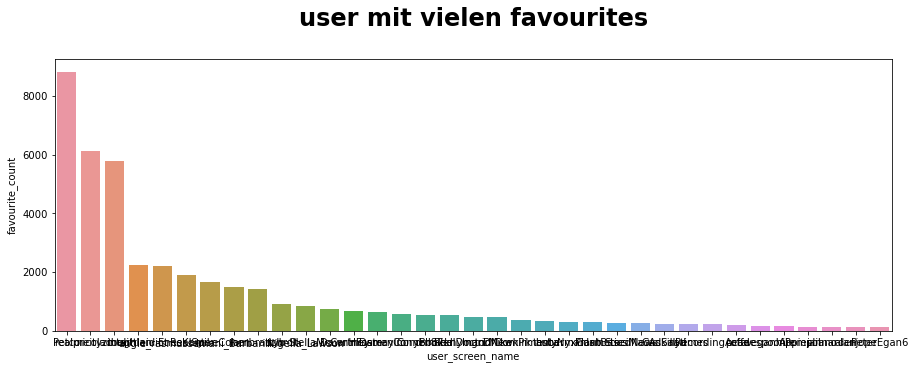

In [18]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen favourites", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_screen_name", y="favourite_count", data=df_favour)

In [19]:
t_ret_viele = tweets_df['retweet_count'].quantile(viele)
df_ret = tweets_df.loc[(tweets_df['retweet_count'] >= t_ret_viele)].drop_duplicates("user_name").sort_values(by=['retweet_count'], ascending=False)[['user_id','user_name','user_screen_name','followers_count','retweet_count','favourite_count','friends_count']]
df_ret

user_id                    user_name user_screen_name  \
1037  1202264747539718144             𝒥𝒶𝓃𝒶𝓇𝒶✨ʳᵉˢᵗ`ᵉˣᵃᵐ        cutiejmna   
873   1170025054261993473                        Winsh            winsh   
1112   801275328920309760                           B🍍    bethanyyyy_04   
2680  1311392159527034880              Vanessza L Vegi           l_vegi   
1075           2342316112                        kenzi       KenzieLohr   
972   1342468257039732740               Nabila Suleman    SulemanNabila   
883   1272294815741419520        hi. tpwk ◟̽◞̽ | hello   Chicken_parma_   
961   1259428232534691842                         Jaga         jaga9177   
208    881942384271130626                       foodie    foodie_nialla   
1005  1364858478599176194                  rest buying  collectjakehoon   
982   1324962354233135105                   ENHY噗嗯的小引擎     ENHY85631982   
1000           2727655940                    SHITTANY🧨         shittany   
2595           2973666801                  Sam Barasch     Vegi_SAMwich   
1353  1320383752460144640  ❄️✧keaya's primogem eyes✧❄️    organic_salt_   
1073           2785758576       Pin-up cosmopolite 🌙🇬🇫          blvckai   
1001  1370954290278264836                  ChinenyeNwa  Chineny72136731   
1108  1232681597746458625                    mazel tov   Legendary_wale   
1111            635457102                      †Pàigè†   JustSomeGurlie   
1116           2946055691                   La Cheli ✨     quetevalga13   
992    789724401969295362               Braylens mom 🦋   fatimachantal_   
994            4252152921                       Leah ✨        AbAlliyah   
903            1059088526          𝓅𝓇ℯ𝓉𝓉𝓎 𝓇ℯ𝒹 𝓉𝒽𝒶𝓃ℊ 💅🏽           2RawHo   
871   1304400183116140545                 athshlgsp⟭⟬⁷     BORAGEGIRLLL   
1004             33146847              Charissa Isidro   charissaisidro   
1017  1356169667643994113               ƈɓɽ ƈɧꀤɣɑɑɳ ⚔️        CBR842626   
273   1110963596509569024                        Rukks     foodie______   
1063             21521603                    Sir Brill    AllNenMustDie   
985    953337157640491008                        Jay 🤧      _Jeremiahh1   
898    896593054420803586            MD Rashid Hossain   MDRashidHossai   
1011   748054096100364288              Mohammed Touqir  mohammed_touqir   
1079   858656684998144001        NIKÉ IS ON THE GROUND        BRATZPINX   
914   1000586095094976512                       𝓁𝑜𝓋𝑒𝓁𝓎           wabwii   
974   1263174438062682113                       𝓐𝓭𝓱𝓪𝓻𝓪     itznicolexxx   
930   1295743353032552448                        pujah    sharifahpujah   
2575  1292106930085756928                    Nani Vegi        vegi_nani   

      followers_count  retweet_count  favourite_count  friends_count  
1037             1541          54333                0           1514  
873               300          47436                0            211  
1112              164          44914                0            128  
2680               12          42270                0             82  
1075              372          34495                0            387  
972                98          29257                0             87  
883                68          25899                0             62  
961                32          20775                0            126  
208               335          15118                0            410  
1005               36          10592                0             45  
982                30          10591                0            293  
1000             1380          10248                0            973  
2595              112           9696                0            273  
1353               26           8851                0            104  
1073             1345           7227                0            545  
1001                6           6670                0             27  
1108              340           5545                0            457  
1111              338           5402   

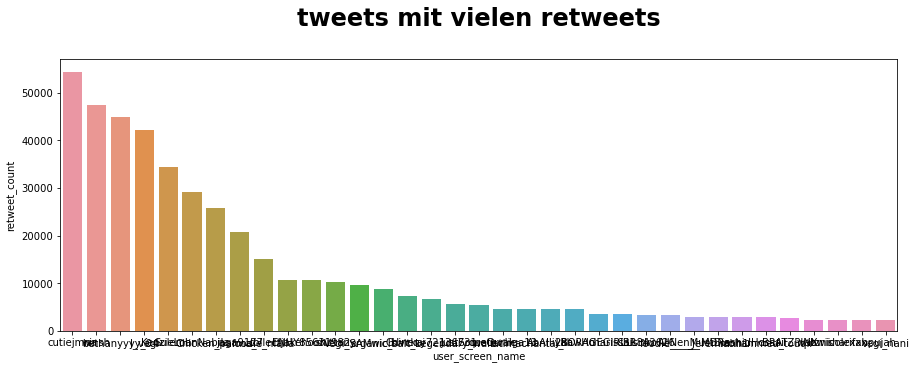

In [20]:
plt.figure(figsize=(15,5))
plt.title("tweets mit vielen retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_screen_name", y="retweet_count", data=df_ret)

### Wer hat am meisten friends?¶

In [21]:
friends_viele = tweets_df['friends_count'].quantile(viele)
df_friends = tweets_df.loc[(tweets_df['friends_count'] >= friends_viele)].drop_duplicates("user_name").sort_values(by=['friends_count'], ascending=False)[['user_id','user_name','user_screen_name','followers_count','retweet_count','favourite_count','friends_count']]
df_friends

user_id                                      user_name  \
1358           2395996238                   Promo for Artists & Business   
638              21842061                                 Stacye Branché   
1182              2883841                                        E! News   
2226             15808765                                    Cory Booker   
399             506007359                                     Animals1st   
259              56980475                            Effrosyni Moschoudi   
637              28803148                              Live Trading News   
182    902468526635667456                                         shonny   
1094           2547233616                                      ᦔ​ꪮ​ꪶ​ꪶ​ꪗ   
241            3866705320                  🇬🇧 Pesto Champion ⭐ Blogger ⭐   
244             140666664  Awesome Books for Self-Help & Personal Growth   
911            2943229768                           S̸  T̸  E̸  E̸ Z̸ Y̸   
559   1028790186090610689                                  AnimalLeaks 🌐   
100             357584312                                        PETA UK   
301             124346967                                 SimpleSteps4LL   
1802            402386558                  Elizabeth 🌱 for the animals Ⓥ   
527             436414193                               Angie Karan Ⓥ 🌱🐾   
1258           2759157810                           The Social Marketers   
1283           1693482374                                MUSIC PROMOTION   
1872           3251639429                                Wendy E. Slater   
1869   785520243313639425                                 Devin Salesman   
1618           3131971197                        DJ-Ms. Pinky Passion 🇺🇸   
2235             17243213                    Recording Academy / GRAMMYs   
522    960969910913585153                                    Veganella 🥦   
7               452100948                                     Peter Egan   
2526            224171314                           The Beauty Shortlist   
205             975422131                                       ＷΛＢΛＮΞ 🃏   
69                6431392                                MomsWhoSave.com   
571   1186342057813729320                         IⓋY #Animalrights🌱🐽🐾🦋🌊   
311            2717993069                         Nonhlanhla Mfengwana 💕   
347             255676070                                        Tayyabs   
2391             41160647                                   Vegan Future   

     user_screen_name  followers_count  retweet_count  favourite_count  \
1358         mzpromoz           309977              0                0   
638     StacyeBranche           196447              1                2   
1182            enews         11778536              1                5   
2226       CoryBooker          4963061             68              550   
399        Animals1st            98353              9                0   
259       FrostieMoss            75916              0                0   
637   Livetradingnews            43373              3                6   
182        Shonny_RSA           103116             89                0   
1094          OhDolll            56077             26                0   
241     PestoChampion            36659              0                3   
244   EarthWizardInfo            33245              0                0   
911        PapiiSteez            48656             25                0   
559      animal_leaks            31331             14                0   
100            PETAUK           100734             42               68   
301    SimpleSteps4LL            28055              0                0   
1802       newstart43            26694              0                0   
527       angie_karan            39023              1                0   
1258      TheSocialMs           104199              0                0   
1283   imusicmarketer            30900              0                0   
1872     WendyESlater        

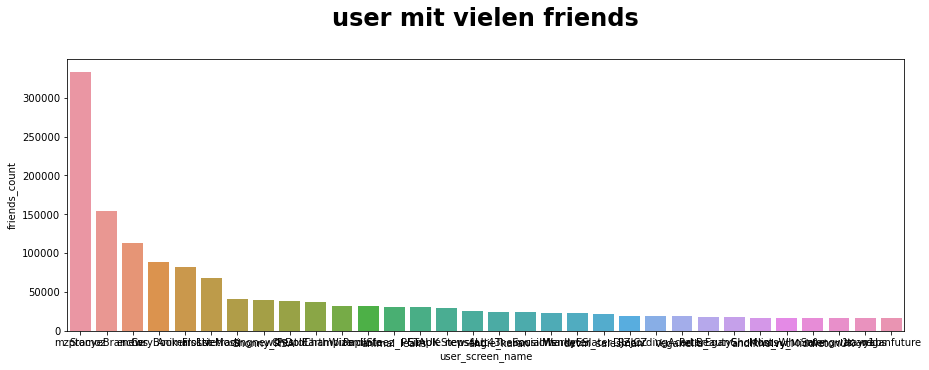

In [22]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen friends", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_screen_name", y="friends_count", data=df_friends)

## Auswertung RT

In [23]:
retweets_val = retweets_df[['followers_count','retweet_count','friends_count']]

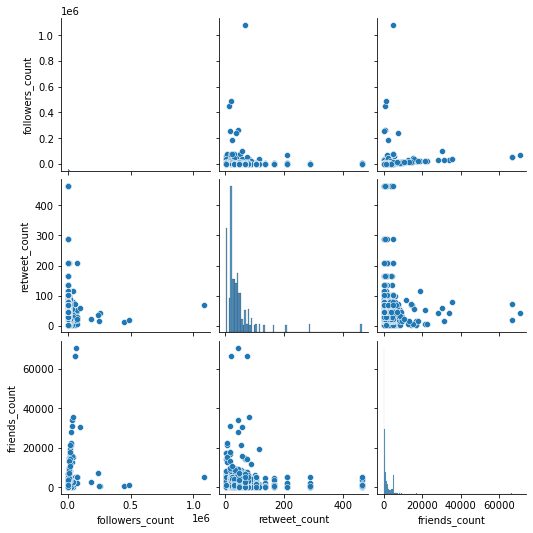

In [24]:
sns.set_context(font_scale=0.05)  
ax = sns.pairplot(retweets_val)

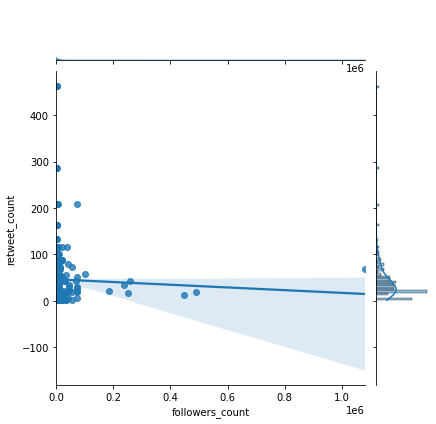

In [25]:
ax = sns.jointplot(x="followers_count", y="retweet_count", data=retweets_df, kind="reg")

In [26]:
ax = sns.jointplot(x="friends_count", y="retweet_count", data=retweets_df, kind="reg")

In [27]:
sns.jointplot(x="friends_count", y="followers_count", data=retweets_df, kind="reg");

In [28]:
plt.figure(figsize=(15,8))
plt.title("retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
sns.set_context(font_scale=2)  
ax = sns.scatterplot(data=retweets_df, x="retweet_count", y="friends_count", size="followers_count", sizes = (20,500))

## Auswertung df

In [29]:
df_val = df[['followers_count_x','retweet_count_x','friends_count_x',  'followers_count_y','retweet_count_y','friends_count_y']]

### Gibt es tweeter, die auch retweeter sind?

In [30]:
subsetdf = df[df['user_id_x'].isin(['user_id_y']) ]
subsetdf

Empty DataFrame
Columns: [Unnamed: 0_x, Unnamed: 0.1_x, tweet_id_x, creation_date_x, full_text_x, mentions_x, entities_hashtags_x, user_name_x, user_screen_name_x, user_id_x, location_x, description_x, protected_x, followers_count_x, friends_count_x, profile_created_at_x, retweet_count_x, favourite_count_x, search_key_x, Unnamed: 0_y, Unnamed: 0.1_y, tweet_id_y, creation_date_y, full_text_y, mentions_y, entities_hashtags_y, user_name_y, user_screen_name_y, user_id_y, location_y, description_y, protected_y, followers_count_y, friends_count_y, profile_created_at_y, retweet_count_y, favourite_count_y, RT_of_ID, search_key_y]
Index: []

[0 rows x 39 columns]

In [31]:
sns.set_context(font_scale= 0.1)  
ax = sns.pairplot(df_val)

## NetworkX

In [32]:
import networkx as nx
import warnings

In [33]:
# Read Our Edgelist
us_graph = nx.from_pandas_edgelist(df,source="user_screen_name_x",target="user_screen_name_y")

In [34]:
G = nx.from_pandas_edgelist(df,source="user_screen_name_x",target="user_screen_name_y")

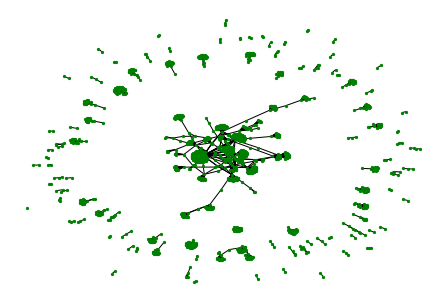

In [35]:
nx.draw(G, with_labels=False, node_color="g", node_size = 5 )

In [36]:
type(G)

networkx.classes.graph.Graph

In [37]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 1489\nNumber of edges: 1464\nAverage degree:   1.9664'

Wieviele Knoten hat unser Graph G?

In [38]:
G.nodes()
len(G.nodes)

1489

## edge-analysis
Was können wir zu den Kanten sagen?

In [39]:
G.edges()

EdgeView([('PeterEgan6', 'eve9tmp'), ('PeterEgan6', 'Victori45792596'), ('PeterEgan6', 'NathaliePhilli5'), ('PeterEgan6', 'flloydthecat'), ('PeterEgan6', '4N1m4l_l0v3R'), ('PeterEgan6', 'ELAINEDAVIES2'), ('PeterEgan6', 'MariaOD05737730'), ('PeterEgan6', 'Bertietheking'), ('PeterEgan6', 'Nightswan_1'), ('PeterEgan6', 'LindsjoLotta'), ('PeterEgan6', 'gudi27'), ('PeterEgan6', 'chellleington'), ('PeterEgan6', 'mariagreenie'), ('PeterEgan6', 'Jan_Leeming'), ('PeterEgan6', 'Mastino1111'), ('PeterEgan6', 'Skeez73691291'), ('PeterEgan6', 'RosemaryLedger'), ('PeterEgan6', 'bibichase'), ('PeterEgan6', '77deedd'), ('PeterEgan6', 'GTK17107134'), ('PeterEgan6', 'siwarr5'), ('PeterEgan6', 'euanfar'), ('PeterEgan6', 'powera372'), ('PeterEgan6', 'BookzDoctor'), ('PeterEgan6', 'KatWhyte2'), ('PeterEgan6', 'LyndaMa15321927'), ('PeterEgan6', 'Moehoffenstein'), ('PeterEgan6', 'ANoiLaParola'), ('PeterEgan6', 'RowenaKirkpatr5'), ('PeterEgan6', 'goodandthegreat'), ('Bertietheking', 'VeganPoet'), ('LindsjoLot

In [40]:
len(G.edges())

1464

In [59]:
edges = df[["user_screen_name_x", "user_screen_name_y", "followers_count_y"]]
edge_group = edges.groupby("user_screen_name_x").count()
edge_group.sort_values(by=["user_screen_name_y"], ascending = True )["user_screen_name_y"].plot(kind = "barh", figsize = (4,22))


<AxesSubplot:ylabel='user_screen_name_x'>

### Ein Blick auf den Graph aller Daten
Wir passen die Grösse des Graphs an, um die Struktur besser zu erkennen.

In [42]:
plt.figure(figsize= (30,30))
nx.draw_networkx(G, with_labels=False, node_color="g", node_size = 30 )

## Measures
Wir testen verschiedene Measures um vergleichen die Ergebnisse. 

### Degree

Direkte Verbindungen der Knoten zählen.

In [43]:
nx.degree(G)

DegreeView({'PeterEgan6': 30, 'eve9tmp': 1, 'Victori45792596': 1, 'NathaliePhilli5': 1, 'flloydthecat': 1, '4N1m4l_l0v3R': 1, 'ELAINEDAVIES2': 1, 'MariaOD05737730': 1, 'Bertietheking': 2, 'Nightswan_1': 1, 'LindsjoLotta': 2, 'gudi27': 1, 'chellleington': 1, 'mariagreenie': 3, 'Jan_Leeming': 1, 'Mastino1111': 1, 'Skeez73691291': 1, 'RosemaryLedger': 1, 'bibichase': 1, '77deedd': 1, 'GTK17107134': 1, 'siwarr5': 1, 'euanfar': 1, 'powera372': 1, 'BookzDoctor': 1, 'KatWhyte2': 1, 'LyndaMa15321927': 1, 'Moehoffenstein': 1, 'ANoiLaParola': 1, 'RowenaKirkpatr5': 1, 'goodandthegreat': 1, 'PETAUK': 84, 'thegaudidragon': 2, 'LancelotLinkSpy': 1, 'toranada': 1, 'MarieDIAS7': 3, 'CoolUkbreez': 1, 'Eire353': 1, 'AviFlyGirl': 1, 'KayeAlfie': 1, 'SevgiEkmekciler': 1, 'kirthurgan': 1, 'mokomokai': 1, 'Superalimentos': 1, 'YarosisNancy': 1, 'animalpenpals': 1, 'NicheTax': 1, 'healing_energy4': 1, 'pati_qs': 1, 'peta': 158, 'Ewa53013872': 1, 'mongoose409': 2, 'fiddy333': 1, 'Elizabeth_NL': 2, 'fatihyenil

Wir sortieren degree nach dem Wert.
Wer hat am meisten direkte Verbindungen?
Was können wir über diese tweeter sagen, sind sie wichtig für unsere veganen burger? 


**Tierschutzorganisationen**
* https://www.peta.org/
* https://mercyforanimals.org/
* https://www.vegansociety.com/
* https://www.peta.de/ingrid-newkirk/


**Plant Based News** is a mission led, multi-award-winning resource creating awareness about ethical consumerism, sustainability and the plant-based lifestyle. Not a false narrative – but information that empowers people to make better choices.
* https://plantbasednews.org/

In [44]:
pd.DataFrame(data = nx.degree(G)).sort_values(by = 1, ascending = False).head(10)

0    1
49               peta  158
31             PETAUK   84
1047  MercyForAnimals   60
839   TheVeganSociety   57
121     IngridNewkirk   54
774    PlantBasedNews   53
229     veganoutreach   43
818     RecordingAcad   38
662        CoryBooker   36
0          PeterEgan6   30

# Wer hat am meisten Einfluss?
nx.degree_centrality(G)

In [45]:
nx.degree_centrality(G)

{'PeterEgan6': 0.020161290322580648,
 'eve9tmp': 0.0006720430107526882,
 'Victori45792596': 0.0006720430107526882,
 'NathaliePhilli5': 0.0006720430107526882,
 'flloydthecat': 0.0006720430107526882,
 '4N1m4l_l0v3R': 0.0006720430107526882,
 'ELAINEDAVIES2': 0.0006720430107526882,
 'MariaOD05737730': 0.0006720430107526882,
 'Bertietheking': 0.0013440860215053765,
 'Nightswan_1': 0.0006720430107526882,
 'LindsjoLotta': 0.0013440860215053765,
 'gudi27': 0.0006720430107526882,
 'chellleington': 0.0006720430107526882,
 'mariagreenie': 0.0020161290322580645,
 'Jan_Leeming': 0.0006720430107526882,
 'Mastino1111': 0.0006720430107526882,
 'Skeez73691291': 0.0006720430107526882,
 'RosemaryLedger': 0.0006720430107526882,
 'bibichase': 0.0006720430107526882,
 '77deedd': 0.0006720430107526882,
 'GTK17107134': 0.0006720430107526882,
 'siwarr5': 0.0006720430107526882,
 'euanfar': 0.0006720430107526882,
 'powera372': 0.0006720430107526882,
 'BookzDoctor': 0.0006720430107526882,
 'KatWhyte2': 0.000672043

In [46]:
most_influential = nx.degree_centrality(G)
for id_tw in sorted(most_influential, key =most_influential.get, reverse = True):
    print("Influencer:", id_tw, "centrality", most_influential[id_tw])

Influencer: peta centrality 0.10618279569892473
Influencer: PETAUK centrality 0.05645161290322581
Influencer: MercyForAnimals centrality 0.040322580645161296
Influencer: TheVeganSociety centrality 0.038306451612903226
Influencer: IngridNewkirk centrality 0.036290322580645164
Influencer: PlantBasedNews centrality 0.035618279569892476
Influencer: veganoutreach centrality 0.028897849462365593
Influencer: RecordingAcad centrality 0.025537634408602152
Influencer: CoryBooker centrality 0.024193548387096777
Influencer: PeterEgan6 centrality 0.020161290322580648
Influencer: jannarden centrality 0.01545698924731183
Influencer: heavenskincare centrality 0.01545698924731183
Influencer: researchmrx centrality 0.014112903225806453
Influencer: FARMUSA centrality 0.014112903225806453
Influencer: missmayim centrality 0.013440860215053765
Influencer: VeganPoet centrality 0.013440860215053765
Influencer: APompliano centrality 0.013440860215053765
Influencer: GadSaad centrality 0.013440860215053765
Influ

Influencer: joelle47019650 centrality 0.0006720430107526882
Influencer: MilkNutrition centrality 0.0006720430107526882
Influencer: vegan_raven centrality 0.0006720430107526882
Influencer: ButterTaeEffect centrality 0.0006720430107526882
Influencer: pittponi centrality 0.0006720430107526882
Influencer: ritajalbkr centrality 0.0006720430107526882
Influencer: straitarrow10 centrality 0.0006720430107526882
Influencer: animal_leaks centrality 0.0006720430107526882
Influencer: lekina_g centrality 0.0006720430107526882
Influencer: mabalos77 centrality 0.0006720430107526882
Influencer: MemeBurk centrality 0.0006720430107526882
Influencer: Bron1954 centrality 0.0006720430107526882
Influencer: Neelima64388845 centrality 0.0006720430107526882
Influencer: IvanTalksWine centrality 0.0006720430107526882
Influencer: YagnikPatel03 centrality 0.0006720430107526882
Influencer: rohnyy23 centrality 0.0006720430107526882
Influencer: rupik958 centrality 0.0006720430107526882
Influencer: AnitaPokhriyal1 cent

Influencer: MNolen_ centrality 0.0006720430107526882
Influencer: My_North_Star centrality 0.0006720430107526882
Influencer: stinkyandsmall centrality 0.0006720430107526882
Influencer: GokuharaSan centrality 0.0006720430107526882
Influencer: Reanimateddoll centrality 0.0006720430107526882
Influencer: imburbujas centrality 0.0006720430107526882
Influencer: aaron_neuton centrality 0.0006720430107526882
Influencer: BelaContessa centrality 0.0006720430107526882
Influencer: Molivermade centrality 0.0006720430107526882
Influencer: jennn31175 centrality 0.0006720430107526882
Influencer: JennMills centrality 0.0006720430107526882
Influencer: JanetMc06592583 centrality 0.0006720430107526882
Influencer: NicoleW_Corus centrality 0.0006720430107526882
Influencer: KayHugsTweets centrality 0.0006720430107526882
Influencer: SafePlaceSafeS1 centrality 0.0006720430107526882
Influencer: therealden78 centrality 0.0006720430107526882
Influencer: DunphyLori centrality 0.0006720430107526882
Influencer: whone

Influencer: kpack01 centrality 0.0006720430107526882
Influencer: AllicatMonster centrality 0.0006720430107526882
Influencer: Paulricy centrality 0.0006720430107526882
Influencer: espourtoe centrality 0.0006720430107526882
Influencer: ktholivia99 centrality 0.0006720430107526882
Influencer: beckyjdaly centrality 0.0006720430107526882
Influencer: CookieNScreen centrality 0.0006720430107526882
Influencer: kazodyl centrality 0.0006720430107526882
Influencer: santaanico centrality 0.0006720430107526882
Influencer: Larutsch centrality 0.0006720430107526882
Influencer: ItsRachelH centrality 0.0006720430107526882
Influencer: WSpark98NZ2 centrality 0.0006720430107526882
Influencer: nofunlesbian centrality 0.0006720430107526882
Influencer: itsMIKEYY centrality 0.0006720430107526882
Influencer: DanesGeorgia centrality 0.0006720430107526882
Influencer: Urielle_KM centrality 0.0006720430107526882
Influencer: _andjim centrality 0.0006720430107526882
Influencer: findgizel centrality 0.000672043010752

Influencer: Hasso46 centrality 0.0006720430107526882
Influencer: pepe_nature centrality 0.0006720430107526882
Influencer: sevsahin21 centrality 0.0006720430107526882
Influencer: ThuraiMoorthy centrality 0.0006720430107526882
Influencer: Marek_PK centrality 0.0006720430107526882
Influencer: KishandaKish centrality 0.0006720430107526882
Influencer: ADRIANAMTZ4 centrality 0.0006720430107526882
Influencer: Lusalane centrality 0.0006720430107526882
Influencer: grifone92 centrality 0.0006720430107526882
Influencer: LillaW35103450 centrality 0.0006720430107526882
Influencer: Praesensabsens centrality 0.0006720430107526882
Influencer: LisaLisaw1 centrality 0.0006720430107526882
Influencer: Petbunny4 centrality 0.0006720430107526882
Influencer: Lauren4homes2 centrality 0.0006720430107526882
Influencer: VICTORM98983893 centrality 0.0006720430107526882
Influencer: barnvicus centrality 0.0006720430107526882
Influencer: Isabell81575603 centrality 0.0006720430107526882
Influencer: jjessie711 central

### Closeness Centrality

https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/#:~:text=Definition%3A%20Betweenness%20centrality%20measures%20the,shortest%20path%20between%20other%20nodes.&text=It%20does%20this%20by%20identifying,the%20flow%20around%20a%20system.

In [47]:
nx.closeness_centrality(G, u=None, distance=None)

{'PeterEgan6': 0.11021825682813316,
 'eve9tmp': 0.09028860131089386,
 'Victori45792596': 0.09028860131089386,
 'NathaliePhilli5': 0.09028860131089386,
 'flloydthecat': 0.09028860131089386,
 '4N1m4l_l0v3R': 0.09028860131089386,
 'ELAINEDAVIES2': 0.09028860131089386,
 'MariaOD05737730': 0.09028860131089386,
 'Bertietheking': 0.11301242766403269,
 'Nightswan_1': 0.09028860131089386,
 'LindsjoLotta': 0.11335866671937592,
 'gudi27': 0.09028860131089386,
 'chellleington': 0.09028860131089386,
 'mariagreenie': 0.12159141905095071,
 'Jan_Leeming': 0.09028860131089386,
 'Mastino1111': 0.09028860131089386,
 'Skeez73691291': 0.09028860131089386,
 'RosemaryLedger': 0.09028860131089386,
 'bibichase': 0.09028860131089386,
 '77deedd': 0.09028860131089386,
 'GTK17107134': 0.09028860131089386,
 'siwarr5': 0.09028860131089386,
 'euanfar': 0.09028860131089386,
 'powera372': 0.09028860131089386,
 'BookzDoctor': 0.09028860131089386,
 'KatWhyte2': 0.09028860131089386,
 'LyndaMa15321927': 0.09028860131089386

### Most important connection eigenvector

In [48]:
most_important_connection = nx.eigenvector_centrality(G)
most_important_connection

{'PeterEgan6': 0.0006649621614819123,
 'eve9tmp': 5.088749559577233e-05,
 'Victori45792596': 5.088749559577233e-05,
 'NathaliePhilli5': 5.088749559577233e-05,
 'flloydthecat': 5.088749559577233e-05,
 '4N1m4l_l0v3R': 5.088749559577233e-05,
 'ELAINEDAVIES2': 5.088749559577233e-05,
 'MariaOD05737730': 5.088749559577233e-05,
 'Bertietheking': 0.0005707131009268663,
 'Nightswan_1': 5.088749559577233e-05,
 'LindsjoLotta': 0.0050631873583000635,
 'gudi27': 5.088749559577233e-05,
 'chellleington': 5.088749559577233e-05,
 'mariagreenie': 0.0016796240846143995,
 'Jan_Leeming': 5.088749559577233e-05,
 'Mastino1111': 5.088749559577233e-05,
 'Skeez73691291': 5.088749559577233e-05,
 'RosemaryLedger': 5.088749559577233e-05,
 'bibichase': 5.088749559577233e-05,
 '77deedd': 5.088749559577233e-05,
 'GTK17107134': 5.088749559577233e-05,
 'siwarr5': 5.088749559577233e-05,
 'euanfar': 5.088749559577233e-05,
 'powera372': 5.088749559577233e-05,
 'BookzDoctor': 5.088749559577233e-05,
 'KatWhyte2': 5.08874955

In [49]:
for id_tw in sorted(most_important_connection,key = most_important_connection.get, reverse = True):
    print("Connector: ", id_tw)

Connector:  peta
Connector:  PETAUK
Connector:  FaribaParniani
Connector:  CyndyPartyOf5
Connector:  ra_mc
Connector:  Mercede65952900
Connector:  emilyyy_rose97
Connector:  giselamv8282
Connector:  kat_pep_
Connector:  Macheath1
Connector:  theresemiket
Connector:  Leafs4E
Connector:  mongoose409
Connector:  Calendula2016
Connector:  brassa11
Connector:  julietjohns
Connector:  Elizabeth_NL
Connector:  schmoozequeen
Connector:  LOVE_CATS_ONE
Connector:  createtime_
Connector:  AfLadyhawk
Connector:  ramondeavila
Connector:  Wolf_Girl_Yulia
Connector:  DrdaveAnddee
Connector:  urbangenii
Connector:  faktchekker
Connector:  BODYBYLlON
Connector:  GaiaPluto
Connector:  ZoieFanAnna2
Connector:  Ewa53013872
Connector:  fiddy333
Connector:  fatihyenilmez5
Connector:  sherielk
Connector:  Carolinakitikin
Connector:  Giovannaconfal6
Connector:  OssoffWarnockGA
Connector:  IFannyy
Connector:  QueensOfWarrior
Connector:  jesseimae
Connector:  melissaaramini
Connector:  ortizjr_v
Connector:  Fla

Connector:  federicomazand9
Connector:  HeroOfAllAliens
Connector:  MariTer63785253
Connector:  AleRichmondok
Connector:  Rhys_Hawkins
Connector:  jediobijuan
Connector:  Plant_Recipes
Connector:  JoakimClifton
Connector:  RecordingAcad
Connector:  CoryBooker
Connector:  AladinoJaime1
Connector:  Khaeriy88884075
Connector:  gwslea_
Connector:  DiChristine
Connector:  mjsbigblog
Connector:  Jocelyn25206573
Connector:  Kiko17097972
Connector:  DANNYFURLONGDJ
Connector:  Brights35184826
Connector:  FamousPixs
Connector:  official_tumise
Connector:  Rahimallsk1
Connector:  Tomohiko_3960
Connector:  OfficialSheyma1
Connector:  bismark_spartan
Connector:  MRCloydWilson
Connector:  ShesKing8
Connector:  _Official_Addy
Connector:  joe_taapopi
Connector:  CourageAtitsog8
Connector:  RealGeoclooney
Connector:  pears7059
Connector:  kvnggjakee_
Connector:  Corina_Marti
Connector:  swtkookie01_21
Connector:  YOUNGT51094268
Connector:  houstonmadegal_
Connector:  Sumebe904
Connector:  LeendorM
Conn

Connector:  brujamiope
Connector:  UBEREATSCODE6
Connector:  DoorDas93195685
Connector:  _diamondblak
Connector:  SustainTrends
Connector:  StacyeBranche
Connector:  LovMusic11
Connector:  Oneworldnews_
Connector:  Anayr7
Connector:  jananaayakan
Connector:  thisisSamaran
Connector:  HawksBestie
Connector:  rawrrbaby
Connector:  FreshCartons
Connector:  Imshivanidahiya
Connector:  stylesatlife
Connector:  Yashasv00879015
Connector:  VitaminsMemory
Connector:  AvigalLuna
Connector:  ATT_FECollege
Connector:  ATT_Wellbeing
Connector:  archanadhawandr
Connector:  GulliyaVikram
Connector:  ntelng
Connector:  ThomasOgooluwa
Connector:  helpmeorganics
Connector:  RealCheshireSet
Connector:  enews
Connector:  Soriano310ms
Connector:  IngramValleyGB
Connector:  NlandNP
Connector:  wickedcurrent1
Connector:  Farm_Machinery_
Connector:  EJPSOIL
Connector:  LBerggreen
Connector:  Samaelle2
Connector:  jakeyapp
Connector:  gumkenth
Connector:  LegacyWM1
Connector:  Thenaturesco
Connector:  Natasha

### What is the shortest connection between ....

In [50]:
def path(graph,a,b):    
    try: return(nx.shortest_path(graph,a, b))
    except: return("no connection")

In [51]:
a = "Cousin Grexit"
b = 'Linda Mann'
path(G,a,b)

'no connection'

### Betweenness-Centrality

In [52]:
nx.betweenness_centrality(G)

{'PeterEgan6': 0.018538775594556012,
 'eve9tmp': 0.0,
 'Victori45792596': 0.0,
 'NathaliePhilli5': 0.0,
 'flloydthecat': 0.0,
 '4N1m4l_l0v3R': 0.0,
 'ELAINEDAVIES2': 0.0,
 'MariaOD05737730': 0.0,
 'Bertietheking': 0.002408602281045979,
 'Nightswan_1': 0.0,
 'LindsjoLotta': 0.008036662967959175,
 'gudi27': 0.0,
 'chellleington': 0.0,
 'mariagreenie': 0.012929257911282289,
 'Jan_Leeming': 0.0,
 'Mastino1111': 0.0,
 'Skeez73691291': 0.0,
 'RosemaryLedger': 0.0,
 'bibichase': 0.0,
 '77deedd': 0.0,
 'GTK17107134': 0.0,
 'siwarr5': 0.0,
 'euanfar': 0.0,
 'powera372': 0.0,
 'BookzDoctor': 0.0,
 'KatWhyte2': 0.0,
 'LyndaMa15321927': 0.0,
 'Moehoffenstein': 0.0,
 'ANoiLaParola': 0.0,
 'RowenaKirkpatr5': 0.0,
 'goodandthegreat': 0.0,
 'PETAUK': 0.060239442268162,
 'thegaudidragon': 0.0,
 'LancelotLinkSpy': 0.0,
 'toranada': 0.0,
 'MarieDIAS7': 0.0017697837436310123,
 'CoolUkbreez': 0.0,
 'Eire353': 0.0,
 'AviFlyGirl': 0.0,
 'KayeAlfie': 0.0,
 'SevgiEkmekciler': 0.0,
 'kirthurgan': 0.0,
 'mokomok

In [64]:
best_connector = nx.betweenness_centrality(G)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

peta 0.11124159013882981
FARMUSA 0.06514094564167904
PETAUK 0.060239442268162
IngridNewkirk 0.05244966009136393
veganoutreach 0.04738795083092429
TheVeganSociety 0.04039811612306215
MercyForAnimals 0.038307918056474564
PlantBasedNews 0.03704484952287159
Change 0.033619639150537256
researchmrx 0.03265618309347436
ra_mc 0.02362458490220976
TRVST_Eco 0.02297329544221967
SuzyPelta 0.02275048629339581
StopEatingAnim1 0.02053640511674657
thelittleidiot 0.020260718340311373
PeterEgan6 0.018538775594556012
VeganPoet 0.01786216113380811
BODYBYLlON 0.01746182336384825
ChubbieVegan 0.016303633883140146
ZoieFanAnna2 0.014947646629209421
jannarden 0.014526433390459248
mariagreenie 0.012929257911282289
missmayim 0.01278167987447471
mimib85092099 0.011532462176532423
TheSocialCTV 0.010608517546333456
VeganBot1 0.010592699452603568
YvonneHooper20 0.009856932121396187
PETAAsia 0.00938590217489518
PetaIndia 0.009294711875682437
FaribaParniani 0.009232570839200899
CyndyPartyOf5 0.009232570839200899
Visio

mov46 0.0
Debz7172 0.0
Shawna62451765 0.0
lucrezzzina 0.0
pamelahodgson3 0.0
StuartGojotrain 0.0
TigerJJX 0.0
vansgma 0.0
Iam_meera81 0.0
Zogrif 0.0
RileyRogers217 0.0
ZoeyPMA 0.0
katkhrol62 0.0
Avenged7Souls 0.0
ghenderson1013 0.0
grandedette 0.0
joanietorre 0.0
lady_appaloosa 0.0
kkentris 0.0
nicolasadler 0.0
emmyd30 0.0
CoolDog_UK 0.0
PaulPH69 0.0
VeganPeace_sBsV 0.0
pita_louise 0.0
sistor111 0.0
SchmitterCecile 0.0
irenetresp1701 0.0
andy_christophi 0.0
dolphin_angels 0.0
MommysPiglet 0.0
maxine_alves 0.0
viergelibre 0.0
ScouseSocialis2 0.0
bagpussisevil 0.0
Tinanees1 0.0
marinelady1962 0.0
ninabclark 0.0
akaushik_23 0.0
Seifer_OfBalamb 0.0
Anita73874109 0.0
TristianSpirit 0.0
Drip_Bayless 0.0
seashel419 0.0
notoriousPEY 0.0
skyblo__ 0.0
eviieeO 0.0
mbdka11 0.0
SenpaiEros 0.0
JoshSainvili1 0.0
ViviCassandra 0.0
lineaahh 0.0
BrittneyXO20 0.0
_Generic__ 0.0
AlexisRenae__ 0.0
thekimwynn 0.0
naturallyaqua 0.0
parrishilt0n 0.0
aristophanes00 0.0
JamesPittard1 0.0
ArzooSorathiya 0.0
Iliv

### Untergruppen

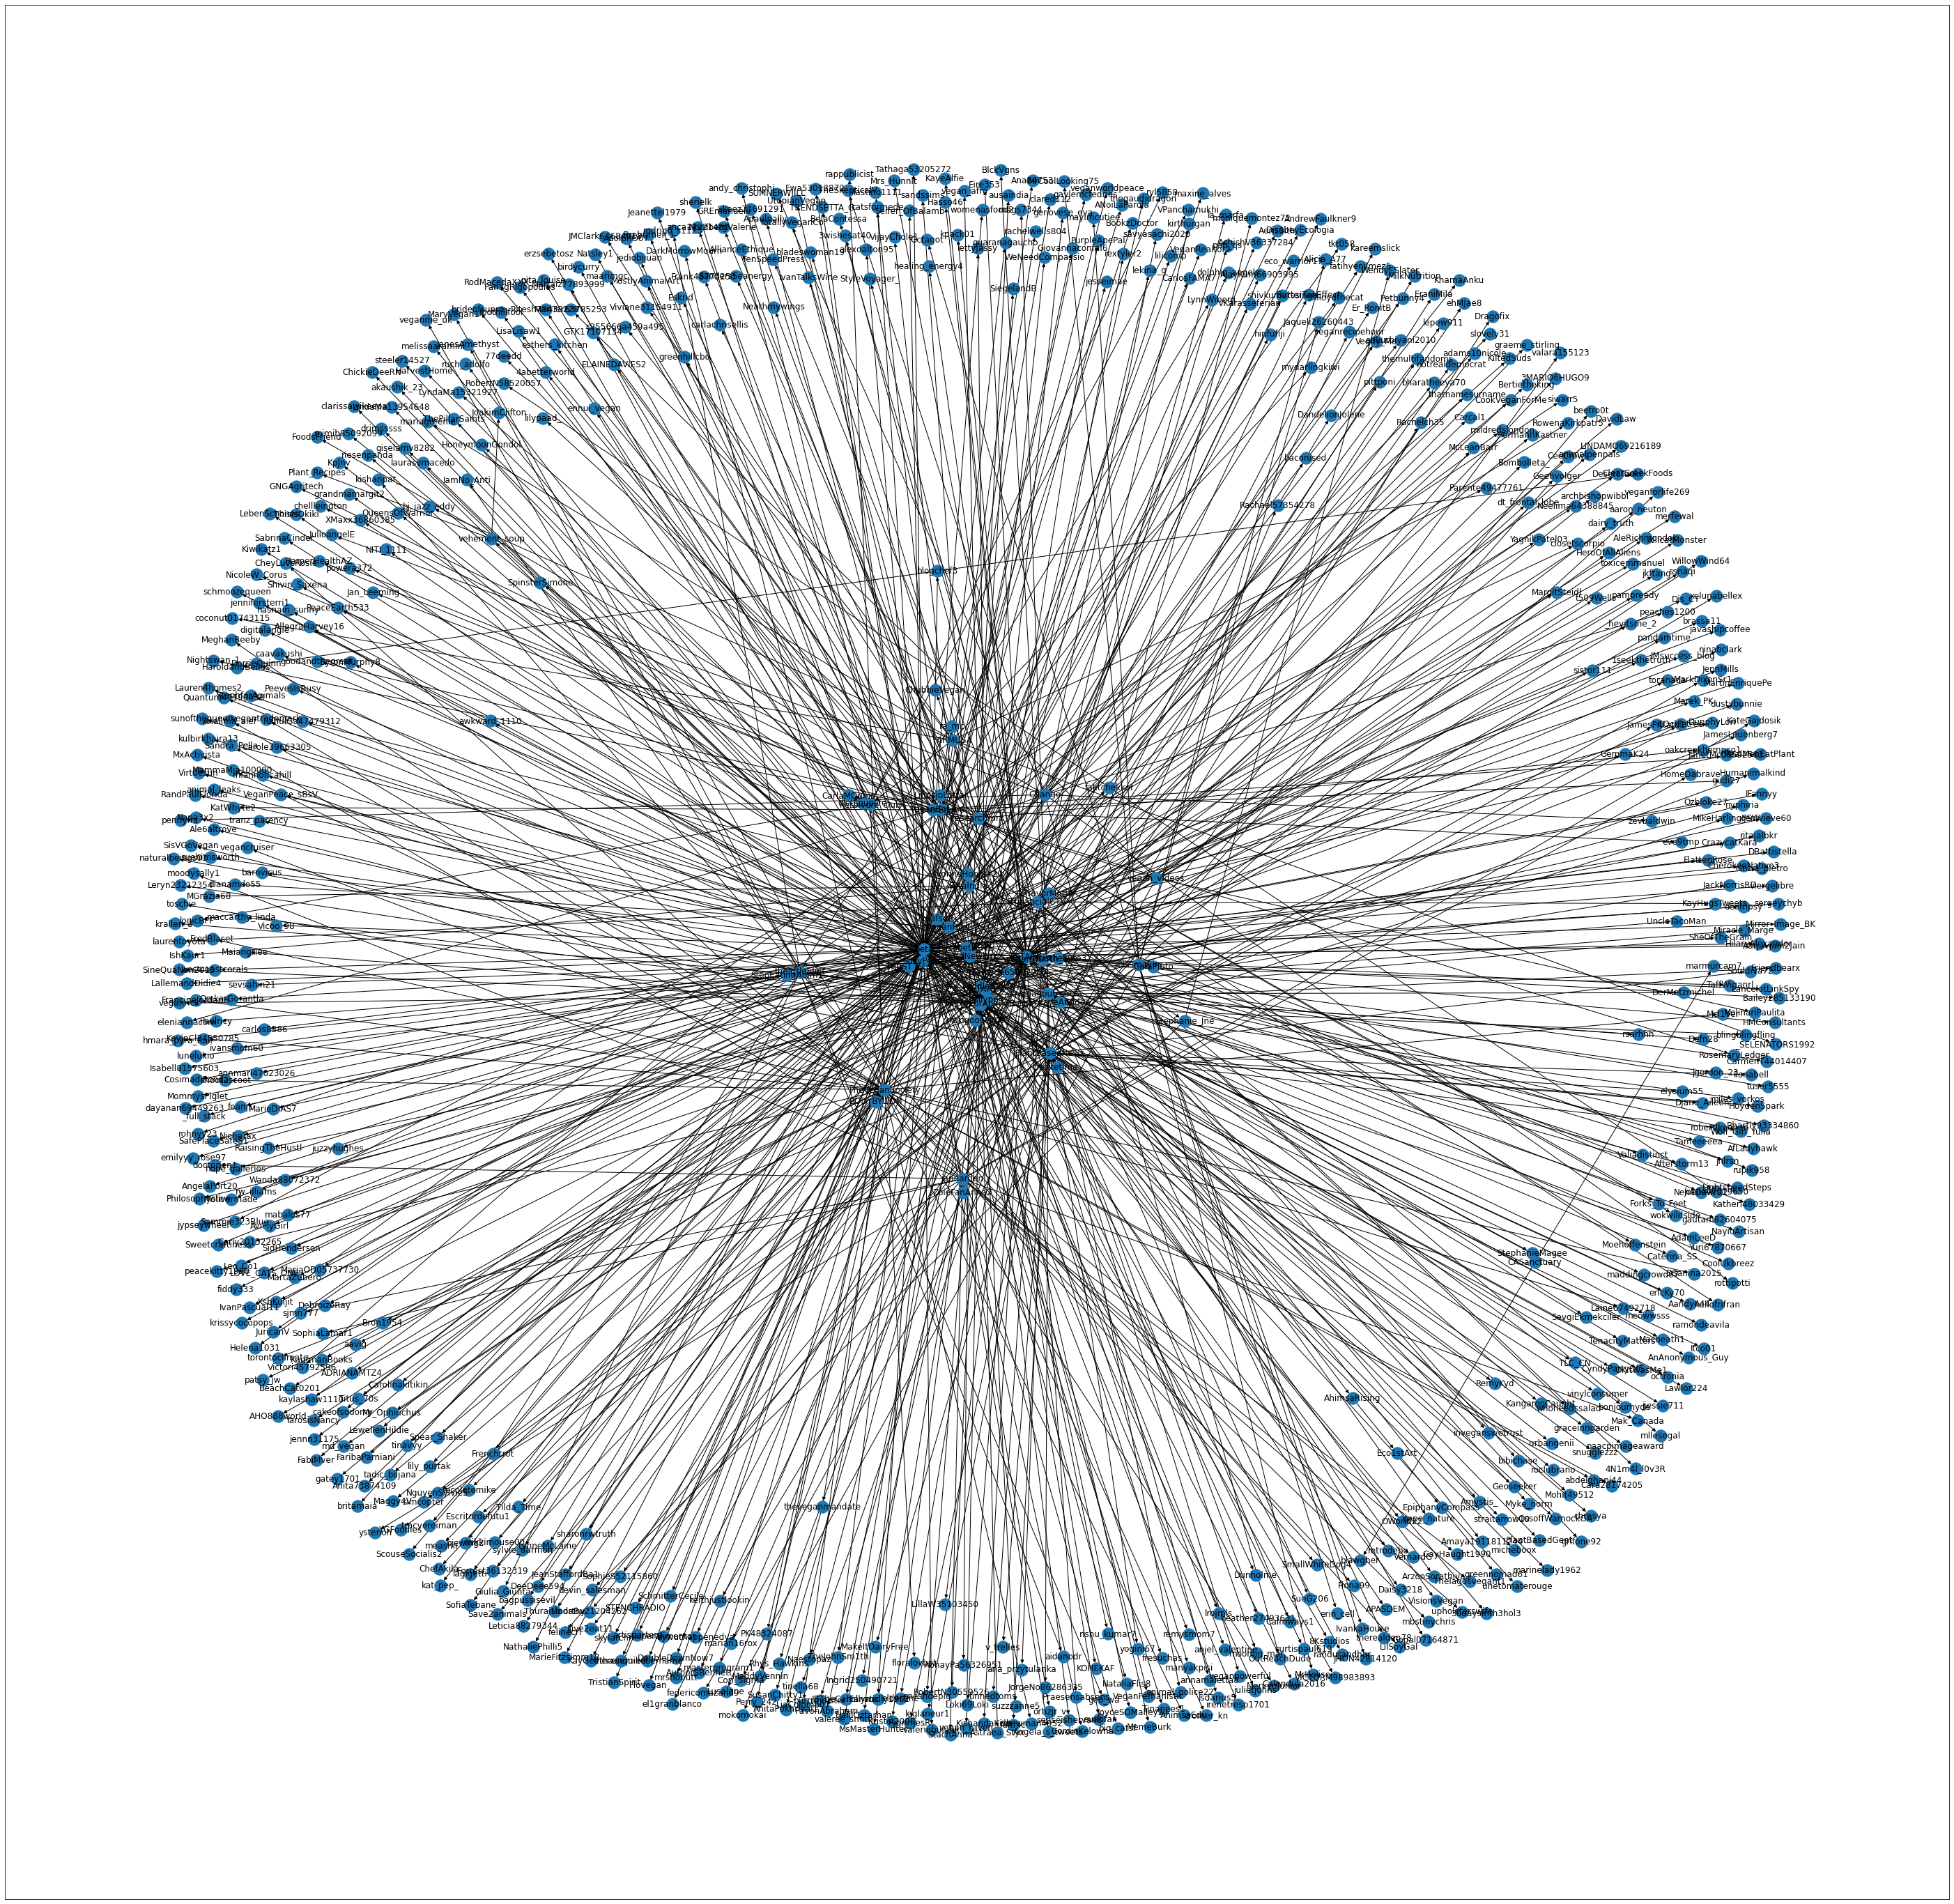

In [73]:
# Best Connector

plt.figure(figsize= (50,50))
group1 = nx.bfs_tree(G,"peta")
nx.draw_networkx(group1)

In [74]:
# Worst Connector

plt.figure(figsize= (50,50))
group2 = nx.bfs_tree(G,"RohitYa26275274")
nx.draw_networkx(group2, node_size = 1)


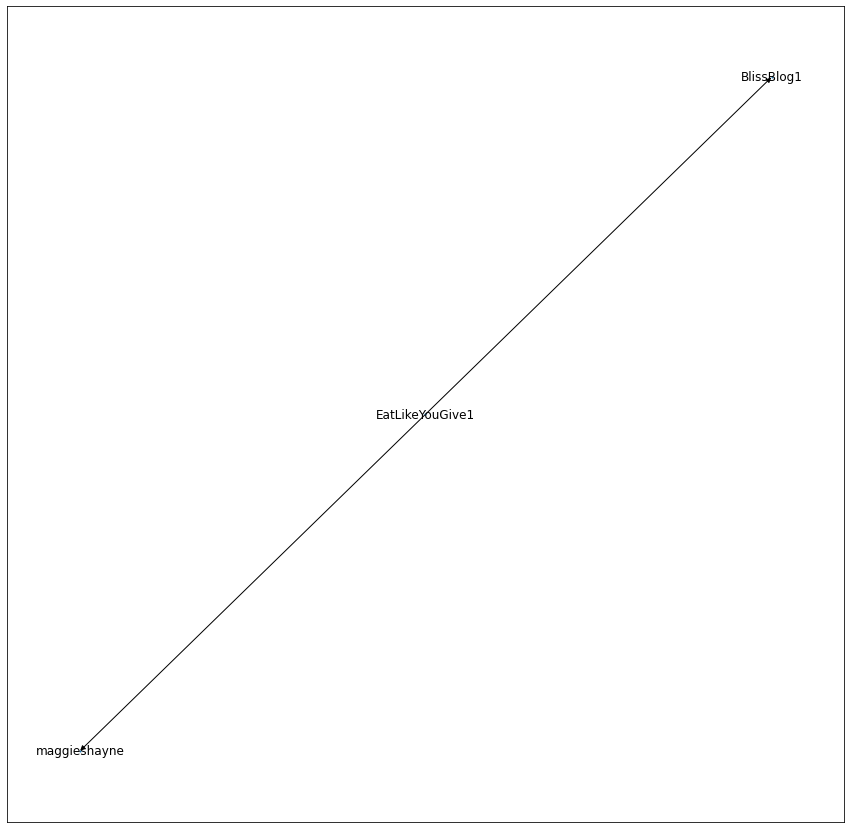

In [76]:
plt.figure(figsize= (15,15))
group3 = nx.bfs_tree(G,"EatLikeYouGive1")
nx.draw_networkx(group3, node_size = 1)


In [ ]:
plt.figure(figsize= (15,15))
group4 = nx.bfs_tree(G,"Jacob")
nx.draw_networkx(group4, node_size = 1)


In [ ]:
nx.degree(G,"Jacob")

In [ ]:
nx.degree(G,"Dawn Foster")

In [ ]:
plt.figure(figsize= (25,25))
group5 = nx.bfs_tree(G,"moby XⓋX")
nx.draw_networkx(group5, node_size = 2)
